<a href="https://colab.research.google.com/github/surapitttha/Python-upskill/blob/main/Diabets(SVM%2C_LogesticRegression_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabets(SVM, LogesticRegression-KNN)

In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
import os
url = 'https://www.kaggle.com/datasets/saramah/diabets-data-set'

od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surapitthaibkhuang
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saramah/diabets-data-set


100%|██████████| 8.91k/8.91k [00:00<00:00, 3.44MB/s]

In [5]:
os.listdir('./diabets-data-set')

['diabetes.csv']

In [41]:
from re import I
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings

In [9]:
data = pd.read_csv('/content/diabets-data-set/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.shape

(768, 9)

##Logistic Regression

In [11]:
diabets_df = pd.DataFrame(data)

In [12]:
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabets_df.describe(include ='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Data Visualization & Analysis

In [14]:
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabets_df.shape

(768, 9)

In [16]:
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
diabets_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

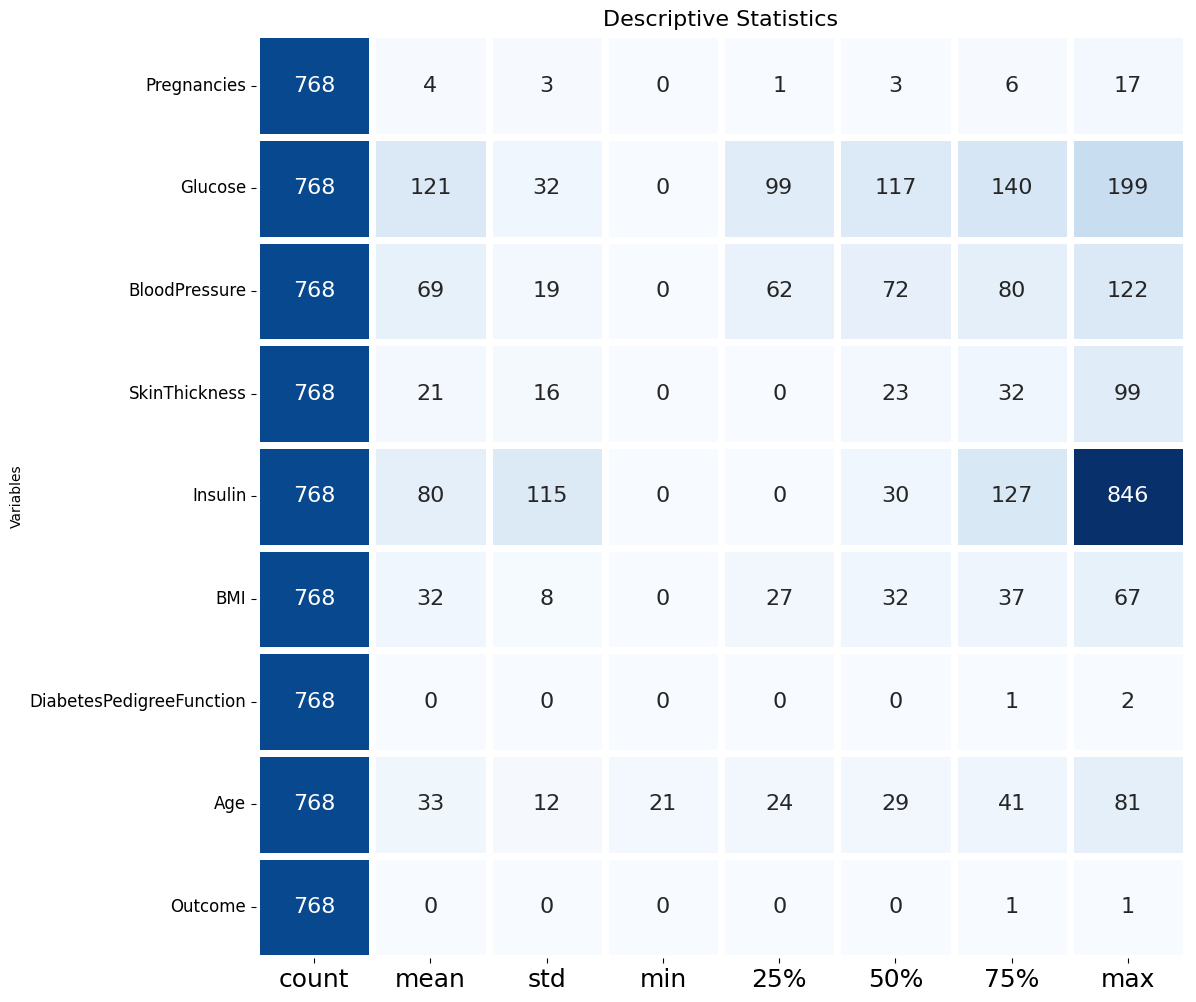

In [21]:
desc = diabets_df.describe().T
diabets_df2 = pd.DataFrame(index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(diabets_df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

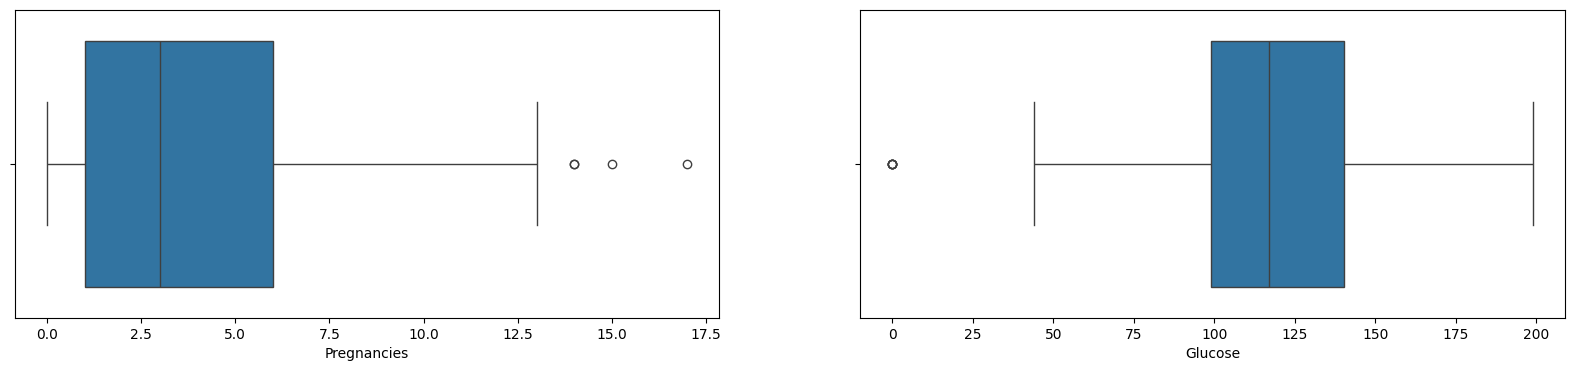

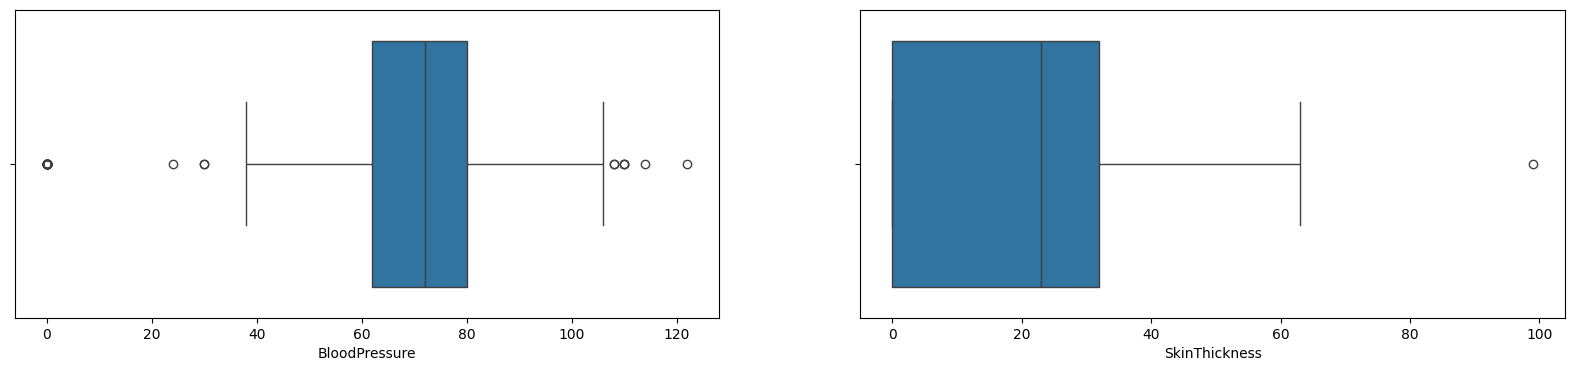

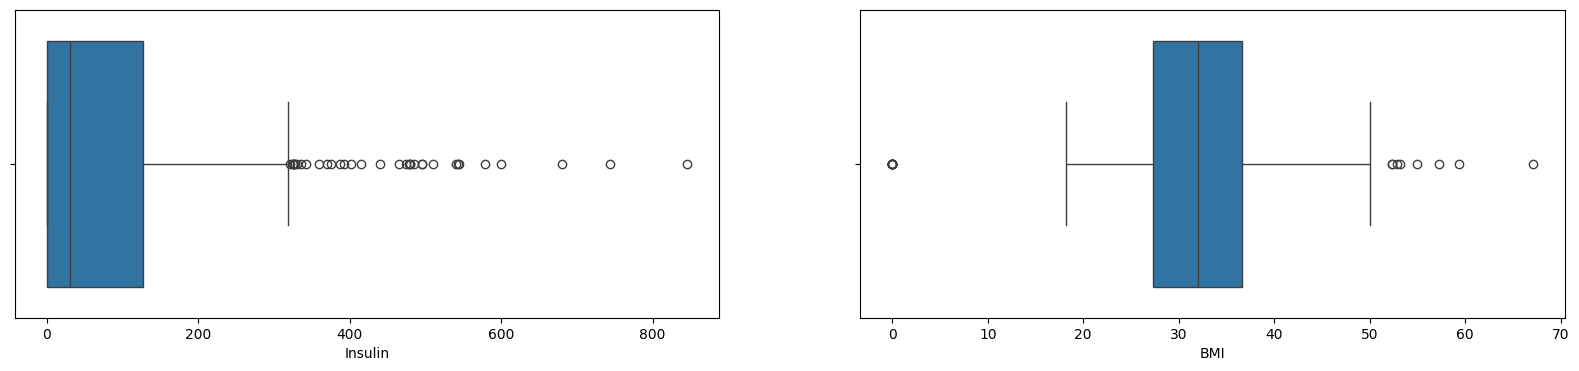

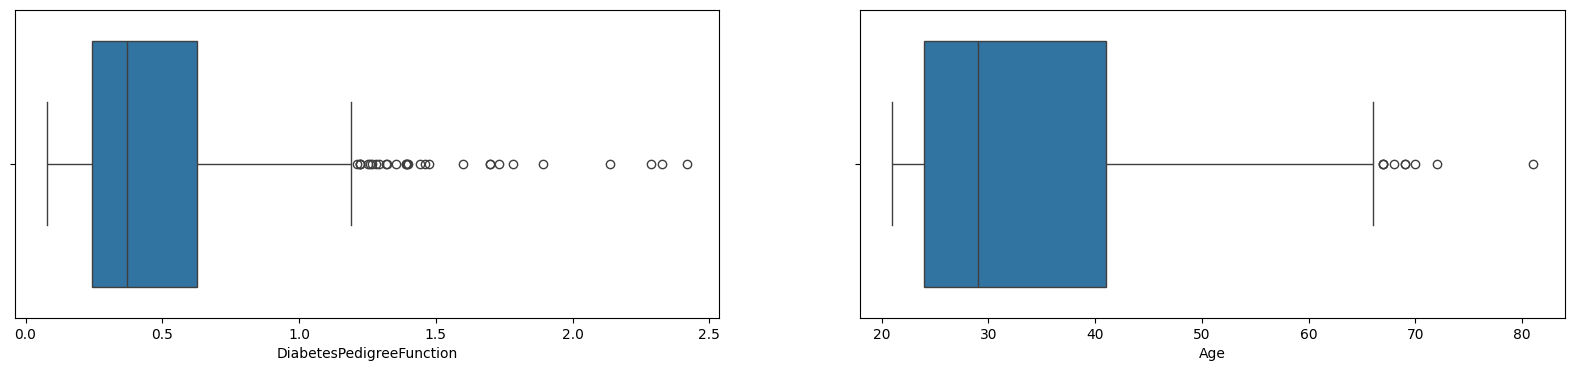

In [22]:
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = diabets_df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = diabets_df)
    i+=1

    plt.show()

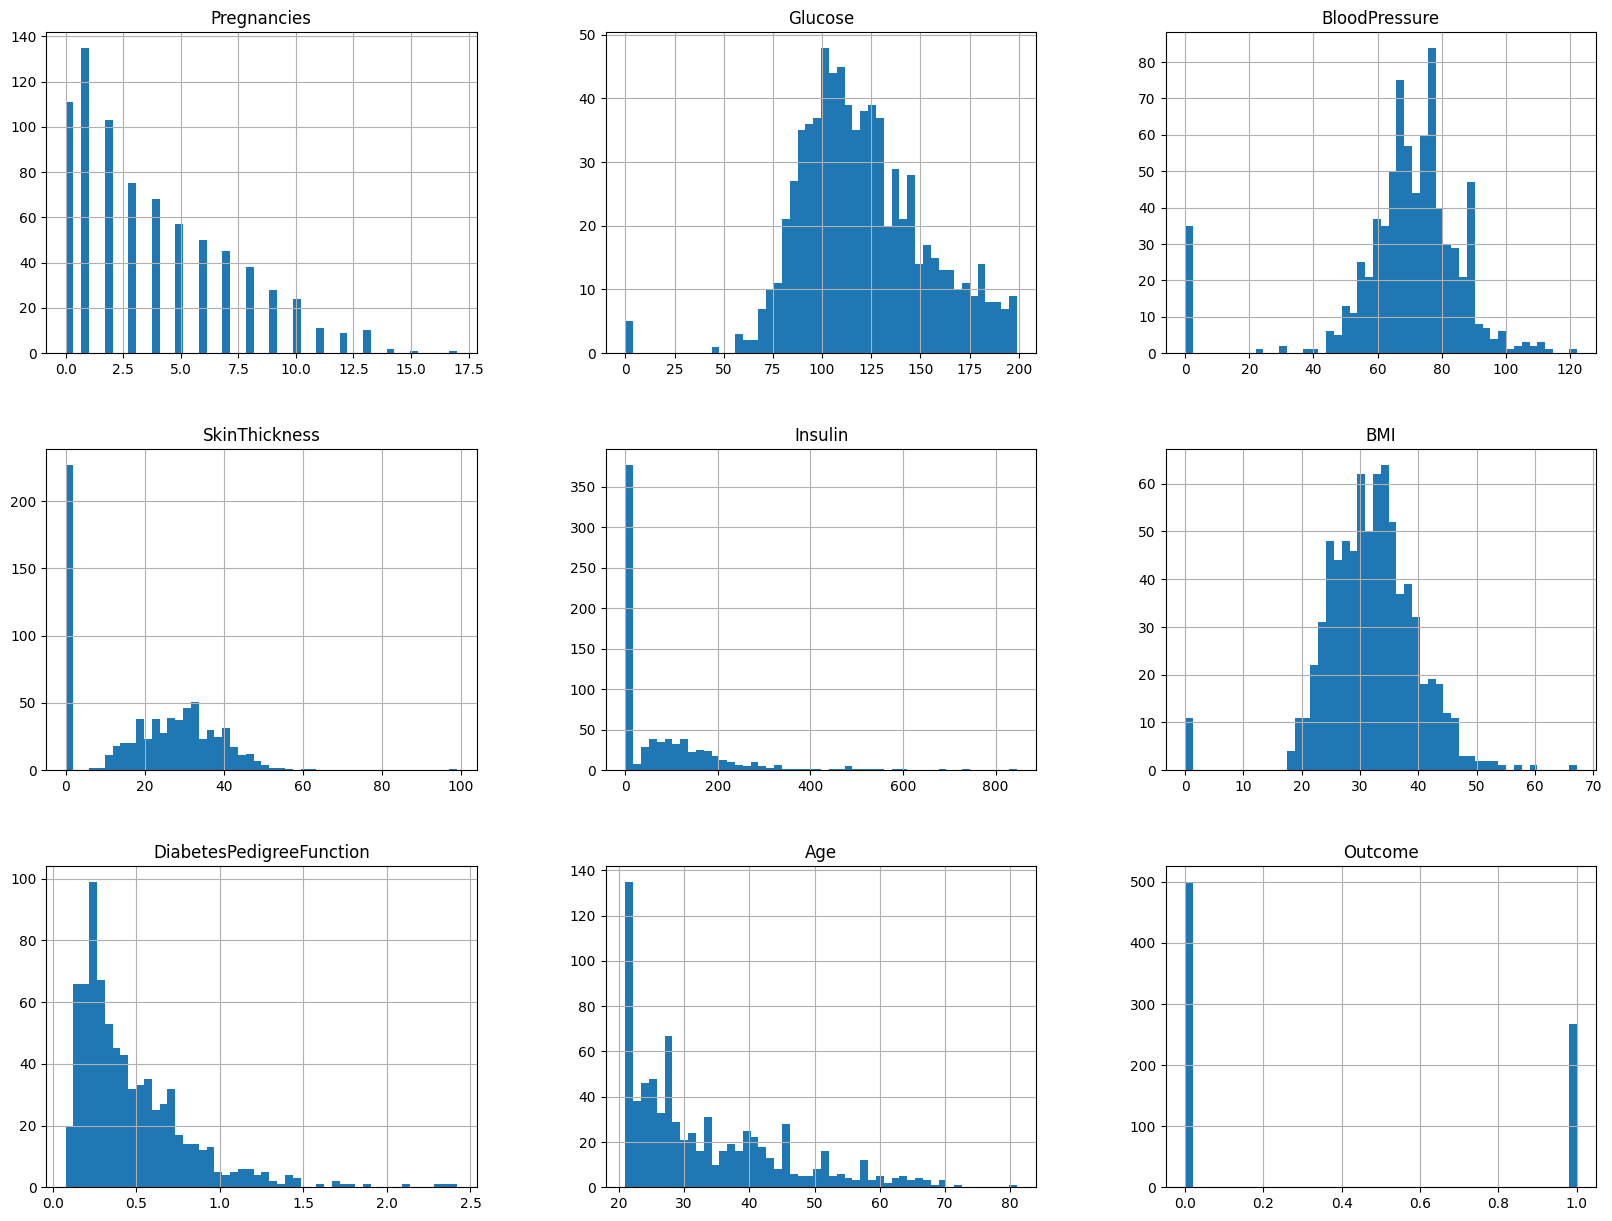

In [23]:
#histogram
diabets_df.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
diabets_df3 = diabets_df.copy()

zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
diabets_df3[zero_col] = diabets_df3[zero_col].replace(0, np.nan)

In [25]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(mean_col)

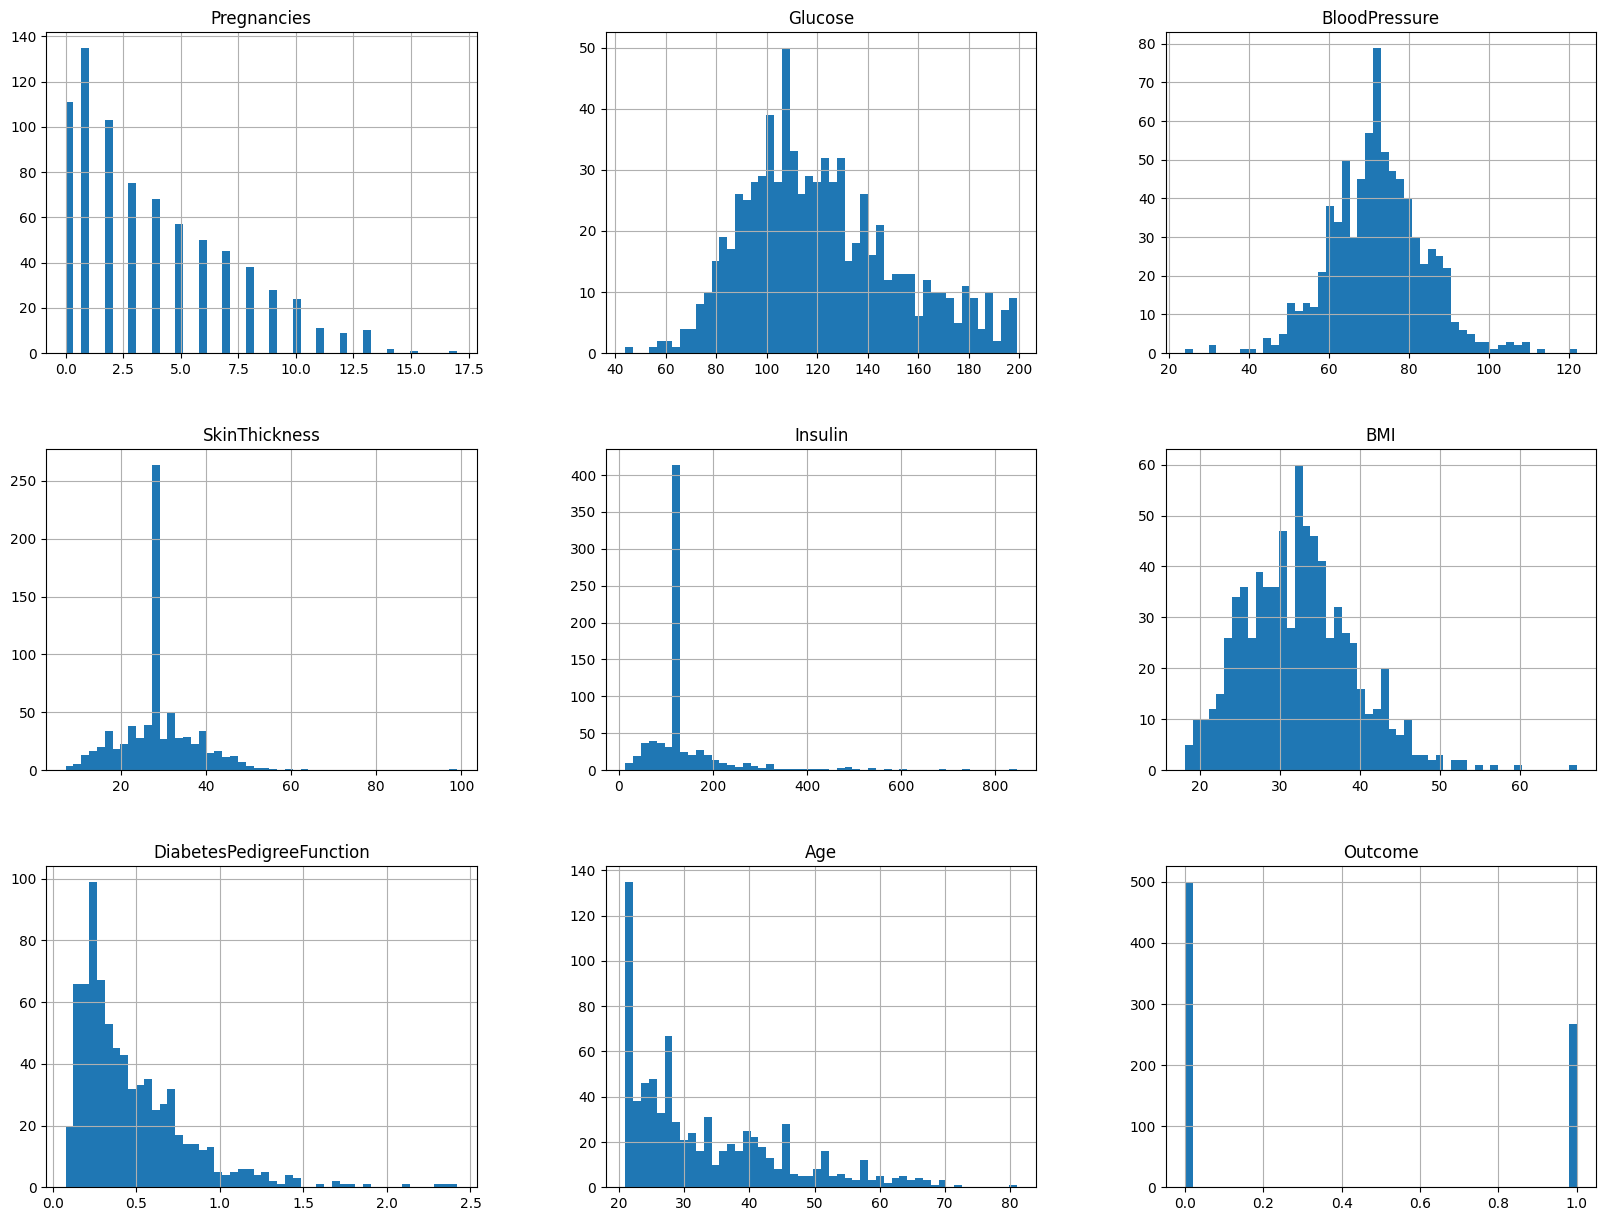

In [26]:
#histogram
diabets_df3.hist(bins=50,figsize=(20,15))
plt.show()

In [27]:
diabets_df3.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

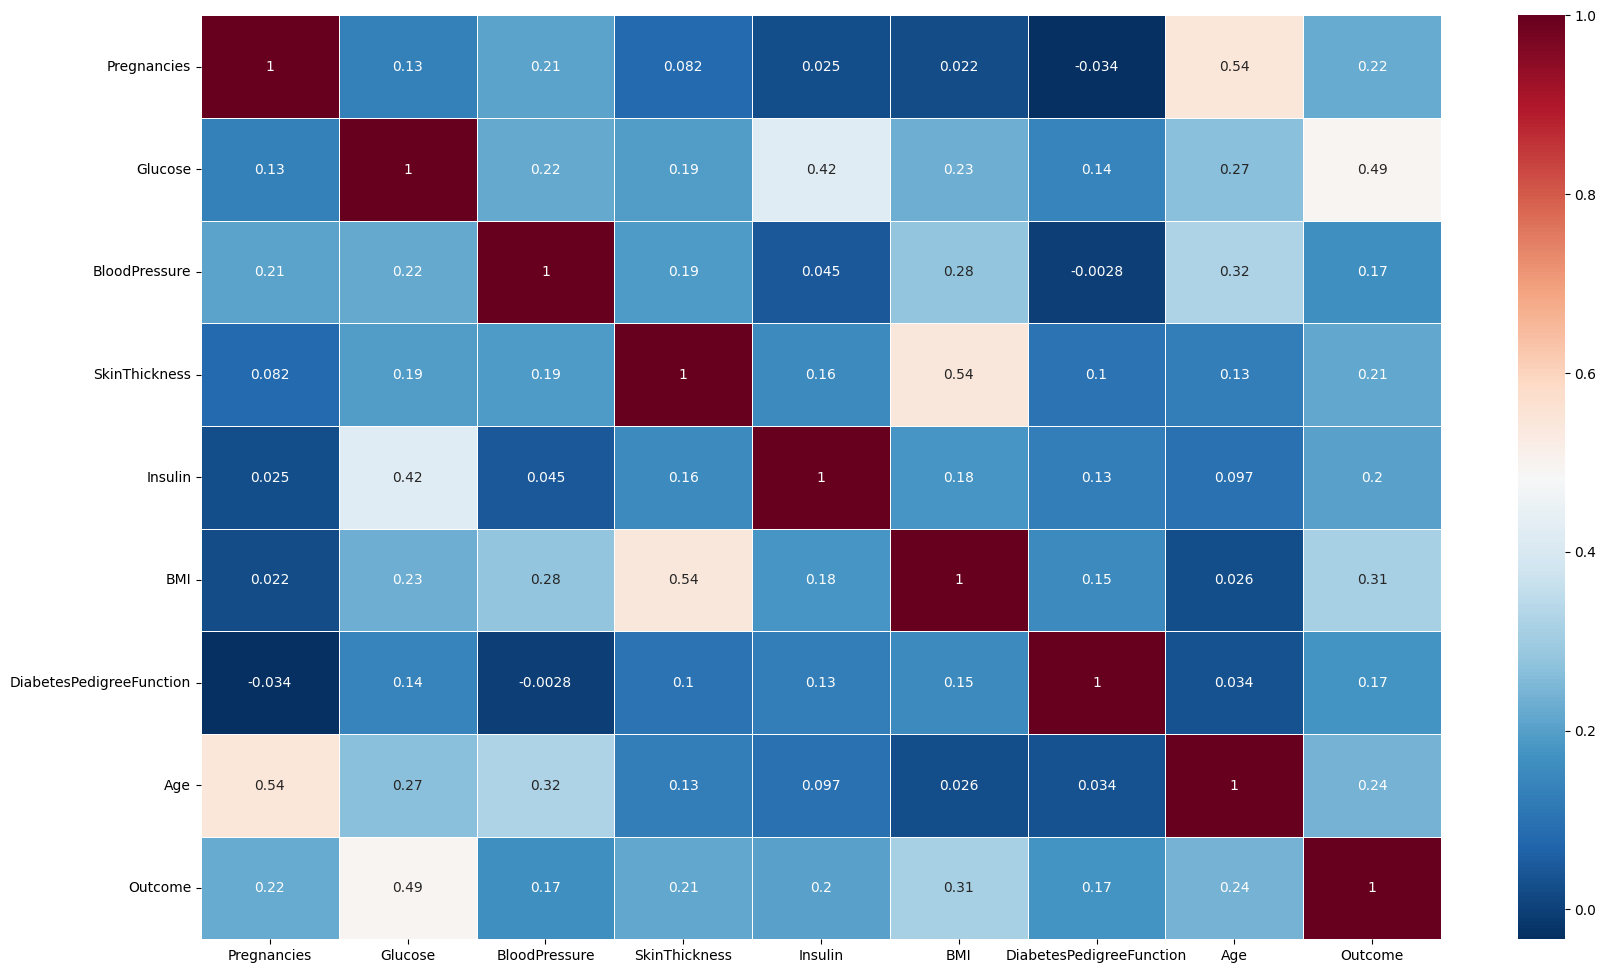

In [28]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(diabets_df3.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [29]:
diabets_df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.191853,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192615,0.191853,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045087,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281268,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [30]:
diabets_df3.corr()['Outcome'].sort_values(ascending=False) #Correlation for get information

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

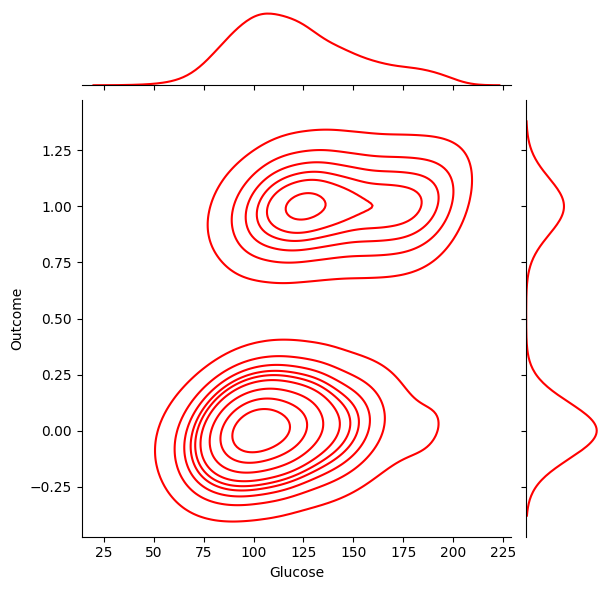

In [31]:
#### How does Glucose is affected by price
sns.jointplot(x='Glucose',y='Outcome',data=diabets_df3,color='red',kind='kde');

##Creating & Training KNN Model

In [33]:
X = pd.DataFrame(diabets_df3.drop(['Outcome'], axis=1)).values
Y = diabets_df3.Outcome.values.reshape(-1,1)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [35]:
Y[:5]

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [36]:
X.shape, Y.shape

((768, 8), (768, 1))

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state =0)


##Modeling

In [39]:
K = 3
CLF = KNeighborsClassifier(n_neighbors=K)
CLF.fit(X_train,Y_train)
Y_pred = CLF.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
K = 20
Acc = np.zeros((K))
for i in range(1 , K+1):
    CLF = KNeighborsClassifier(n_neighbors = i)
    CLF.fit(X_train,Y_train.ravel())
    Y_pred = CLF.predict(X_test)
    Acc[i-1] = accuracy_score(Y_test, Y_pred)
Acc

array([0.64935065, 0.69264069, 0.71428571, 0.72294372, 0.72294372,
       0.70562771, 0.73160173, 0.74891775, 0.76190476, 0.76190476,
       0.74891775, 0.74025974, 0.74025974, 0.74891775, 0.75324675,
       0.74458874, 0.74891775, 0.75324675, 0.75757576, 0.76623377])

K = 20 is Best




In [43]:
print(np.max(Acc))
print(np.min(Acc))

0.7662337662337663
0.6493506493506493


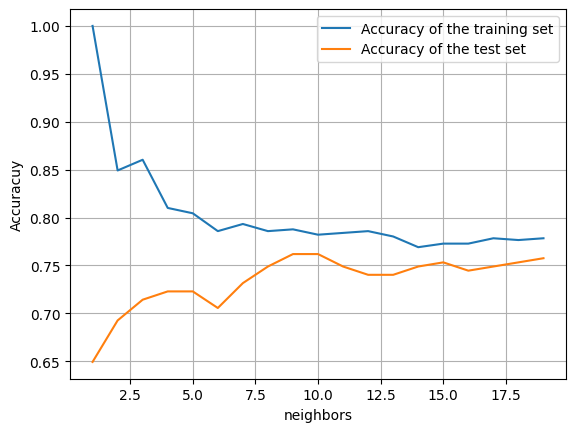

In [52]:
traing_acc = []
test_acc = []

neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting :
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train.ravel())
    traing_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()

###Improval Model

In [58]:
from sklearn.model_selection import GridSearchCV
parametrs = {"n_neighbors": range(1,20) }
grid_kn = GridSearchCV(estimator = knn, #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 5,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = -1)     #help to cpu



grid_kn.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [54]:
CLF.score(X,Y)

0.76953125

In [56]:
Y_pred = CLF.predict(X_test)

In [59]:
print("Accuracy:" , accuracy_score(Y_test,Y_pred ))

Accuracy: 0.7662337662337663


In [60]:
confusion_matrix(Y,CLF.predict(X))

array([[446,  54],
       [123, 145]])

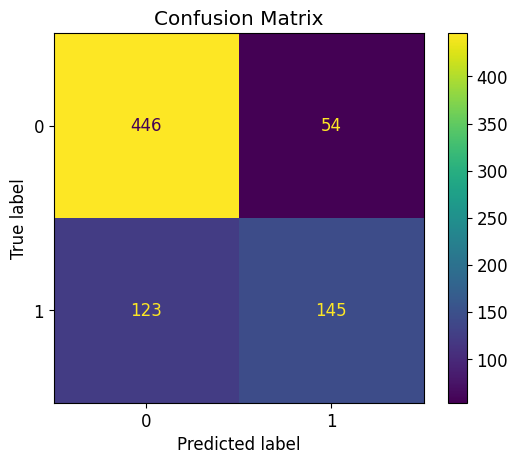

In [61]:
cm = confusion_matrix(Y,CLF.predict(X))
plt.rcParams.update({'font.size':12})
# labels = df.species.unique() #
ConfusionMatrixDisplay(cm).plot() # cmap='Pastel1'
plt.title('Confusion Matrix')
plt.show()

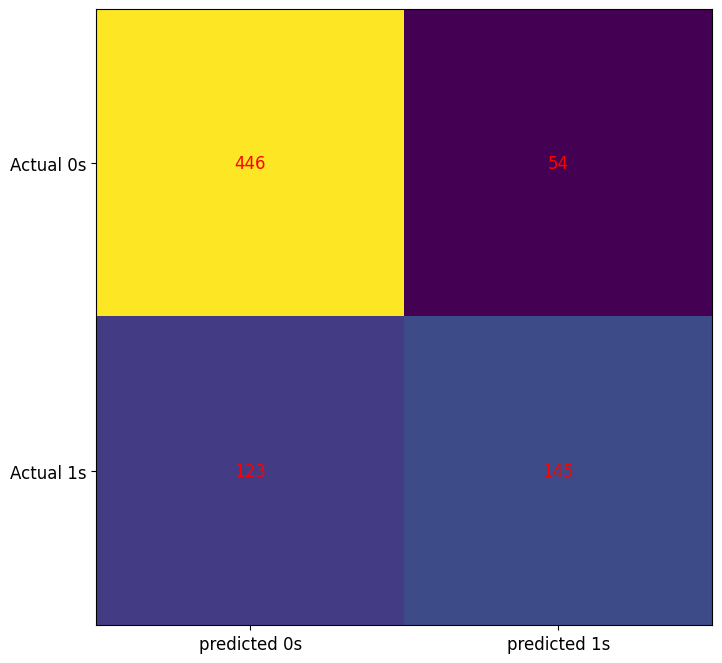

In [62]:
# Show plot for confusion matrix
cm = confusion_matrix(Y, CLF.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

In [63]:
print(classification_report(Y,CLF.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768

